In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay ,recall_score , precision_score ,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve , auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# 0 --> non-fraud
# 1 --> fraud

In [4]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: ylabel='Class'>

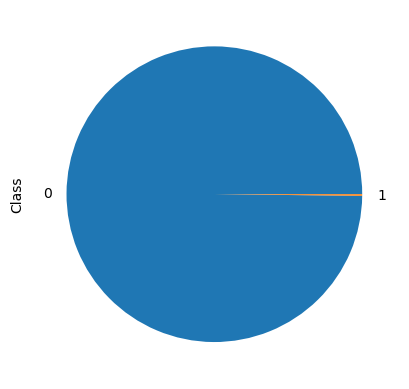

In [5]:
df['Class'].value_counts().plot(kind = 'pie')

# imbalanced dataset as the class of fraud transaction output only represent 1.7% of the total output

# [before UNDER-SAMPLING]

In [6]:
fraud = df[df.Class == 1]
non = df[df.Class == 0 ]
fraud.shape , non.shape 

((492, 31), (284315, 31))

In [7]:
df0 = df
x0 = df0.drop(['Class'] , axis =1)
y0 = df0['Class']
xtrain0, xtest0, ytrain0, ytest0 = train_test_split(x0 ,y0, test_size = 0.3 , random_state= 1)
xtrain0

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
191125,129124.0,-0.190075,0.203323,-0.996232,-1.596985,3.192579,3.356935,0.288299,0.895003,-0.330024,...,-0.007496,-0.170599,-0.619724,0.039651,0.706805,-0.160870,0.274825,-0.010541,0.022199,14.37
153710,99901.0,-0.000313,1.041633,-0.318849,-0.429824,0.927591,-0.784796,0.815404,-0.175950,1.175180,...,-0.284525,0.160884,0.681572,-0.313216,-0.556475,-0.077819,-0.218129,-0.095776,0.037814,9.00
261216,159917.0,2.065603,0.071537,-1.892041,0.190985,0.681571,-0.286226,0.051364,-0.040737,0.314773,...,-0.148721,-0.348255,-0.947148,0.270988,-0.011917,-0.234159,0.185280,-0.069232,-0.046179,1.98
190724,128961.0,2.025587,0.060125,-1.843486,0.347168,0.301427,-0.955263,0.073910,-0.137681,0.525494,...,-0.262006,0.219107,0.722795,-0.054034,-0.490497,0.212825,-0.091711,-0.011126,-0.047441,4.60
127492,78349.0,-0.482824,0.692865,1.397751,0.822699,-0.815530,0.143287,-0.419970,0.605203,-0.650301,...,0.207773,0.255948,0.566025,0.161260,0.057495,-1.055243,0.503132,0.069006,0.112114,46.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,31666.0,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,...,4.315113,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,2312.26
117583,74729.0,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,...,0.396079,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,171.32
73349,55095.0,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,...,-0.127011,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,7.58
267336,162728.0,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.088014,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,94.80


# logistic regression before undersampling

In [8]:
lr0 = LogisticRegression()
lr0.fit(xtrain0,ytrain0)
ypred0 = lr0.predict(xtest0)
#accuracy of predicted values to the test values
acc0 = accuracy_score(ypred0 , ytest0)
acc0

0.9990988144142879

## confusion matrix for logistic regression before undersampling

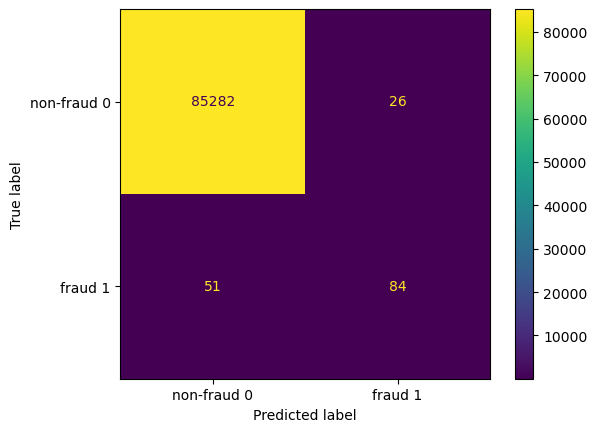

In [9]:
lr0_cm = confusion_matrix(ytest0 , ypred0)
dis0 = ConfusionMatrixDisplay(confusion_matrix = lr0_cm  , display_labels = ['non-fraud 0', 'fraud 1'])
dis0.plot()

In [10]:
fraud_sensitivity_lr0 = recall_score(ytest0 , ypred0)
f1__lr0 = f1_score(ytest0 , ypred0)
precision_lr0 = precision_score(ytest0 , ypred0)

print({"recall":fraud_sensitivity_lr0 ,"Precision":precision_lr0 ,"f1 score" :f1__lr0})

{'recall': 0.6222222222222222, 'Precision': 0.7636363636363637, 'f1 score': 0.6857142857142857}


# decision tree classifier on unsampled data 

In [11]:
dtc_xtrain0 =xtrain0
dtc_xtest0 = xtest0
dtc_ytrain0 = ytrain0
dtc_ytest0 = ytest0
dtc0 = DecisionTreeClassifier()
dtc0.fit(dtc_xtrain0,dtc_ytrain0)

DecisionTreeClassifier()

In [12]:
dtc_ypred0 = dtc0.predict(dtc_xtest0)
acc0_dtc = accuracy_score(dtc_ytest0,dtc_ypred0)
acc0_dtc

0.9992275552122467

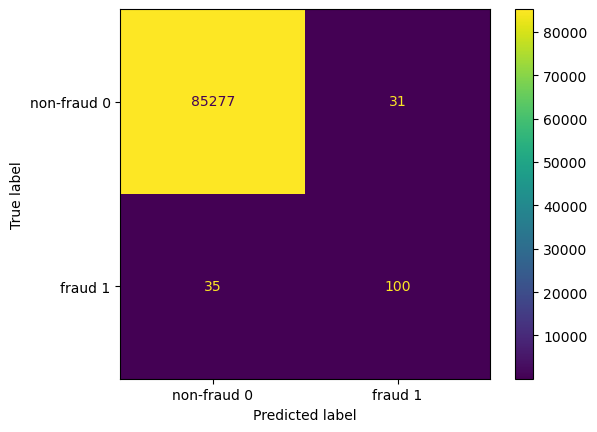

In [13]:
dtc0_cm = confusion_matrix(dtc_ytest0,dtc_ypred0)
dis_dtc0 = ConfusionMatrixDisplay( confusion_matrix = dtc0_cm , display_labels = ['non-fraud 0', 'fraud 1'])
dis_dtc0.plot()

In [14]:
fraud_sensitivity_dtc0 = recall_score(dtc_ytest0,dtc_ypred0)
f1__dtc0 = f1_score(dtc_ytest0,dtc_ypred0)
precision_dtc0 = precision_score(dtc_ytest0,dtc_ypred0)

print({"recall":fraud_sensitivity_dtc0 ,"Precision":precision_dtc0 ,"f1 score" :f1__dtc0})

{'recall': 0.7407407407407407, 'Precision': 0.7633587786259542, 'f1 score': 0.7518796992481204}


## solution : [resampling the data , so the majority is equal to miniority {under-sampling }]

In [15]:
non_sample = non.sample(n=492)
non_sample.shape

(492, 31)

In [16]:
sam = pd.concat([fraud , non_sample] , axis = 0)
sam.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [17]:
 sam.shape

(984, 31)

In [18]:
x =sam.drop(['Class'] , axis =1)
y=sam['Class']
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00


In [19]:
y.head()

541     1
623     1
4920    1
6108    1
6329    1
Name: Class, dtype: int64

In [20]:
y.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x ,y , test_size = 0.3 , random_state= 42)

# applying logistic regression 

In [22]:
lr = LogisticRegression()
lr.fit(xtrain , ytrain)
ypred = lr.predict(xtest)
xtest.shape , xtrain.shape , ytrain.shape , ytest.shape , ypred.shape

((296, 30), (688, 30), (688,), (296,), (296,))

In [23]:
accuracy_score(ypred , ytest)

0.9222972972972973

# confusion matrix for logistic regression evaluation after undersampling

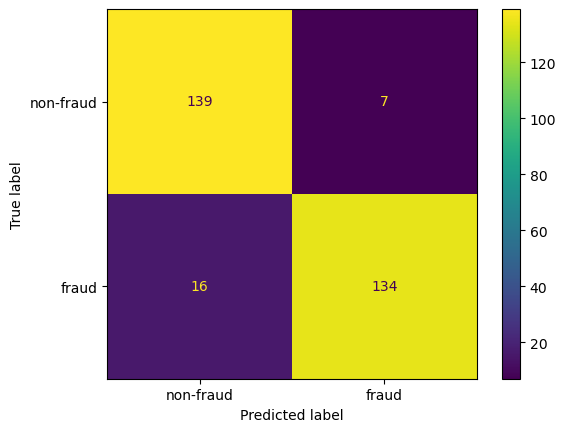

In [24]:
lr_cm = confusion_matrix(ytest , ypred)
dis_lr_cm = ConfusionMatrixDisplay( confusion_matrix = lr_cm , display_labels = ['non-fraud' , 'fraud'])
dis_lr_cm.plot()

In [25]:
fraud_sensitivity_lr = recall_score(ytest , ypred)
f1__lr = f1_score(ytest , ypred)
precision_lr = precision_score(ytest , ypred)

print({"recall":fraud_sensitivity_lr ,"Precision":precision_lr ,"f1 score" :f1__lr})

{'recall': 0.8933333333333333, 'Precision': 0.950354609929078, 'f1 score': 0.9209621993127147}


# apply decision tree classifier on undersampled data

In [26]:
dtc_xtrain =xtrain
dtc_xtest = xtest
dtc_ytrain = ytrain
dtc_ytest = ytest
dtc = DecisionTreeClassifier()

In [27]:
dtc.fit(dtc_xtrain , dtc_ytrain)
dtc_ypred = dtc.predict(dtc_xtest)
accuracy_score(dtc_ytest, dtc_ypred)

0.902027027027027

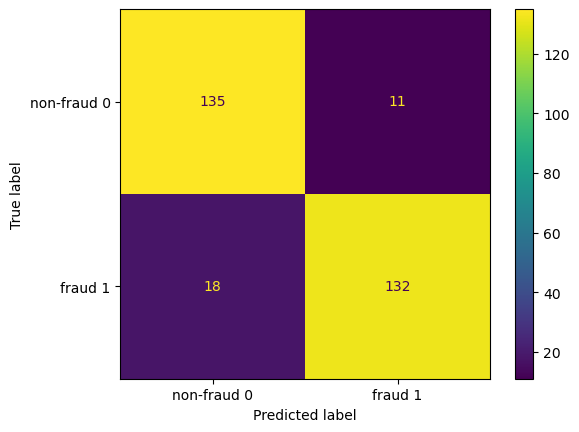

In [28]:
dtc_cm = confusion_matrix(dtc_ytest, dtc_ypred)
dis_dtc = ConfusionMatrixDisplay( confusion_matrix = dtc_cm , display_labels = ['non-fraud 0', 'fraud 1'])
dis_dtc.plot()

In [29]:
fraud_sensitivity_dtc = recall_score(dtc_ytest, dtc_ypred)
f1__dtc = f1_score(dtc_ytest, dtc_ypred)
precision_dtc = precision_score(dtc_ytest, dtc_ypred)

print({"recall":fraud_sensitivity_dtc ,"Precision":precision_dtc ,"f1 score" :f1__dtc})

{'recall': 0.88, 'Precision': 0.9230769230769231, 'f1 score': 0.9010238907849829}


# decision trees is better detecting fraud transactions than Logistic regression

## find the best threshold

In [30]:
#predict the class probabilities for the xtest data 
dtc_prob = dtc.predict_proba(dtc_xtest)
# calculate the roc curve
fpr , tpr , thresholds = roc_curve(dtc_ytest , dtc_prob[:,1])

In [31]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9023287671232877

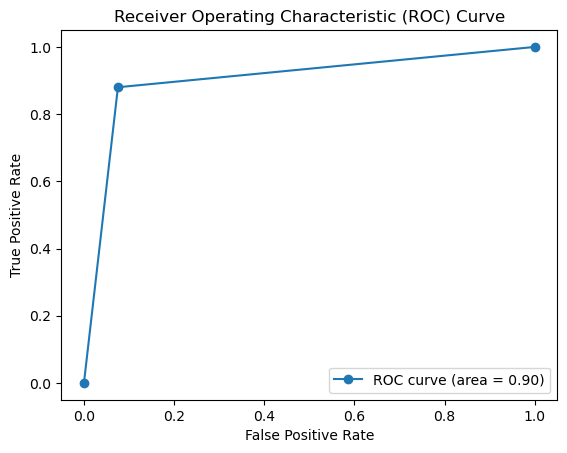

In [32]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc , marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [33]:
dtc_ypred = (dtc_prob[:, 1] >= 0.9).astype(int)

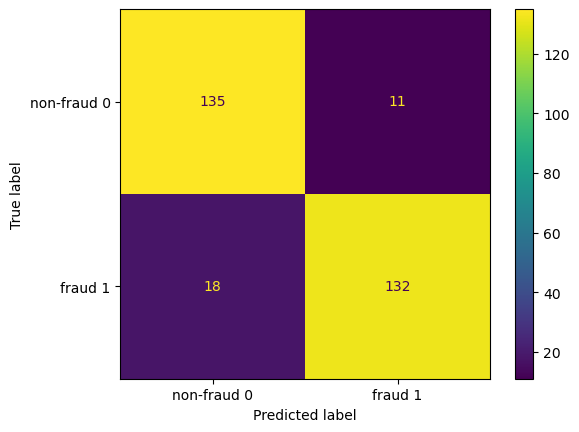

In [34]:
dtc_cm = confusion_matrix(dtc_ytest, dtc_ypred)
dis_dtc = ConfusionMatrixDisplay( confusion_matrix = dtc_cm , display_labels = ['non-fraud 0', 'fraud 1'])
dis_dtc.plot()

In [35]:
fraud_sensitivity_dtc = recall_score(dtc_ytest, dtc_ypred)
f1__dtc = f1_score(dtc_ytest, dtc_ypred)
precision_dtc = precision_score(dtc_ytest, dtc_ypred)

print({"recall":fraud_sensitivity_dtc ,"Precision":precision_dtc ,"f1 score" :f1__dtc})

{'recall': 0.88, 'Precision': 0.9230769230769231, 'f1 score': 0.9010238907849829}
